# Read Raw videos

### Description:
EVETAR sensor format: RG10 (RGGB 10 bits)

Each file has 47 frames, capturing the same static scene.

Lux small -> large: lowlight -> lowlight2 -> lowlight3 -> highlight


In [1]:
import numpy as np
import subprocess
import glob
import skimage.io as imio
import re
from skimage.color import rgb2gray
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
sys.path.append('../')
from utils import *

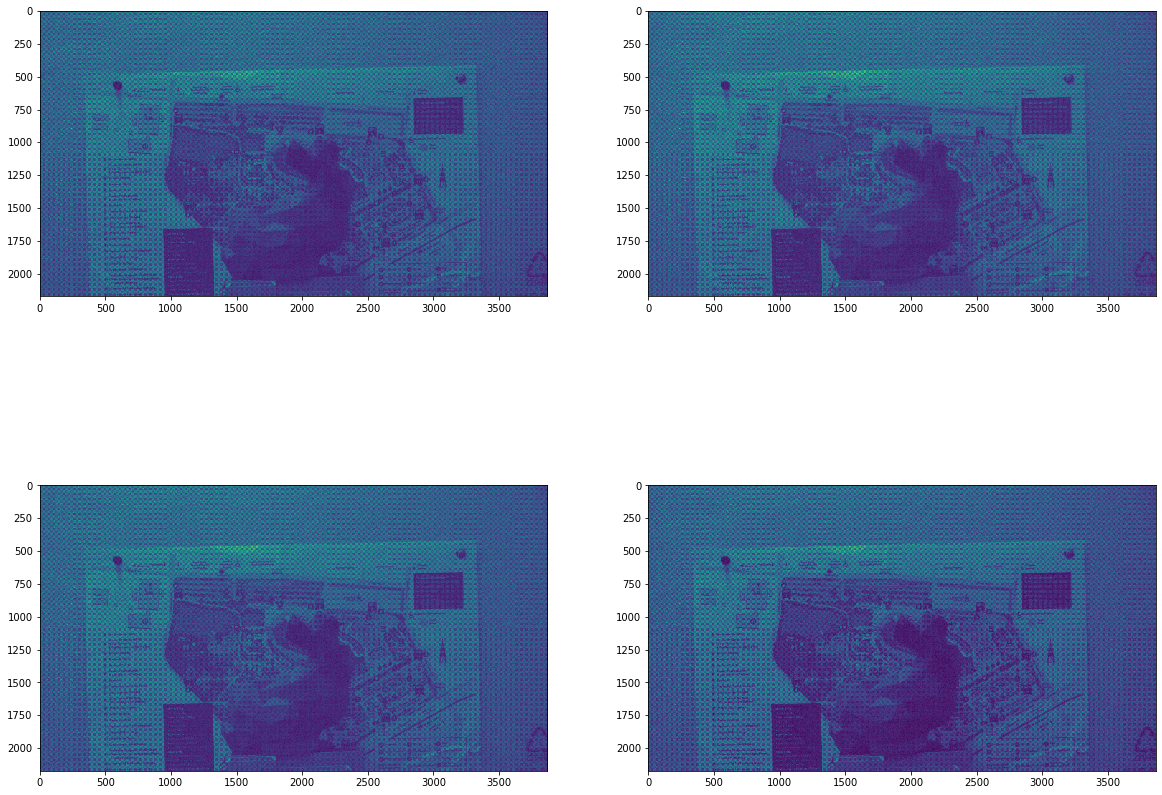

In [5]:
rIm=read_raw("lowlight3_frame64_static.raw", 
             frame = 16, rows=1087*2, runL=3968)

fig, ax = plt.subplots(2, 2, figsize=(20, 16))
ax[0][0].imshow(rIm[0])  # frame 0
ax[0][1].imshow(rIm[6]) # frame 14
ax[1][0].imshow(rIm[7]) # frame 37
ax[1][1].imshow(rIm[8]) # frame 46
plt.show()

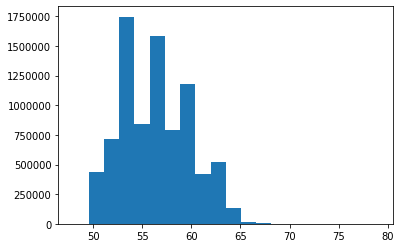

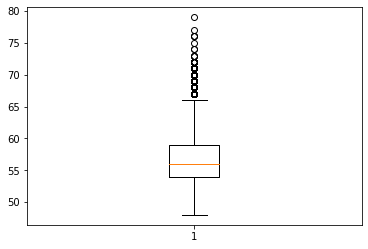

In [6]:
plt.hist(rIm[0].flatten(), bins = 20)
plt.show()
plt.boxplot(rIm[0].flatten())
plt.show()

In [8]:
print_stat("rIm[0]", rIm[0])

rIm[0]  shape:  (2174, 3864) dtype: int16
rIm[0] stat: max: 79, min: 48, mean: 56.361349474592444, std: 3.3709694467851987


In [10]:
rIm[0][rIm[0] > 0].min()

49